Downloading the data using **urlretrive** function from **urllib.request**

In [ ]:
medical_charges_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [ ]:
!pip install urllib3

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7afcf48a5570>)

In [ ]:
!pip install pandas --quiet

In [ ]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Improve default style

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Minimum age = 18 and Maximum = 64. So we can plot them in (64-18) = 47 bins

In [ ]:
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal='box',  # for boxplot
                   nbins = 47,
                   title = 'Distribution of age')
fig.update_layout(bargap = 0.1)
fig.show()

BMI

In [ ]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title = 'Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap = 0.1)
fig.show()

We can see Gaussian distribution because one point is focusing more in the central

Charges

In [ ]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal='box',
                   color = 'smoker',  # for differentiate between smokers and non smokers
                   color_discrete_sequence=['green', 'gray'],
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

Sex

In [ ]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal='box',
                   color = 'sex',  # for differentiate between male and female
                   color_discrete_sequence=['pink', 'blue'],
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

Region

In [ ]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal='box',
                   color = 'region',  # for differentiate between regions
                   color_discrete_sequence=['red', 'yellow','pink','blue'],
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

Smoker

In [ ]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
px.histogram(medical_df, x = 'smoker',color='sex',title='Smokers')

Region

In [ ]:
px.histogram(medical_df, x = 'smoker',color='region',title='Smokers')

Children

In [ ]:
px.histogram(medical_df, x = 'smoker',color='children',title='Smokers')

Age and Charges

In [ ]:
fig = px.scatter(medical_df,
                 x = 'age',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8,
                 hover_data = ['sex'],
                 title = "Age vs Charges")
fig.update_traces(marker_size = 5)
fig.show()

In [ ]:
fig = px.scatter(medical_df,
                 x = 'bmi',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8,
                 hover_data = ['sex'],
                 title = "BMI vs Charges")
fig.update_traces(marker_size = 5)
fig.show()

In [ ]:
px.violin(medical_df, x = "children", y = "charges")

In [ ]:
px.violin(medical_df, x = "sex", y = "charges")

In [ ]:
px.violin(medical_df, x = "region", y = "charges")

Correlation Coefficient: either two columns grow together or correlated or not.
It has a function **.corr** from **pandas**

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

We need numeric data to compute the correlation of two columns

In [ ]:
smoker_values = {'no':0, 'yes':1}  # by using a dictionary
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
medical_df.corr()  # to check the correlation of all columns

<ipython-input-30-cf93875bab50>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


To visualize the correlation we can use heatmaps

<ipython-input-32-65924fd2f272>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



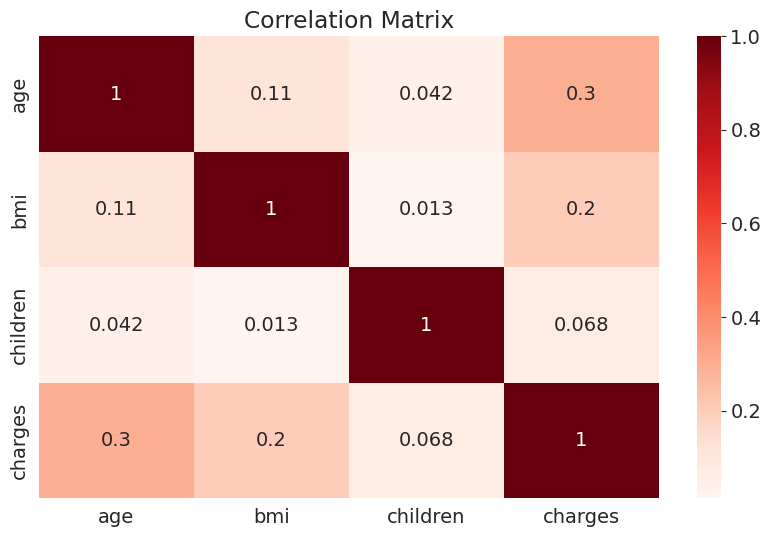

In [ ]:
sns.heatmap(medical_df.corr(), cmap = "Reds", annot = True)
plt.title("Correlation Matrix")
plt.show()

**Linear Regression using a single feature**

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

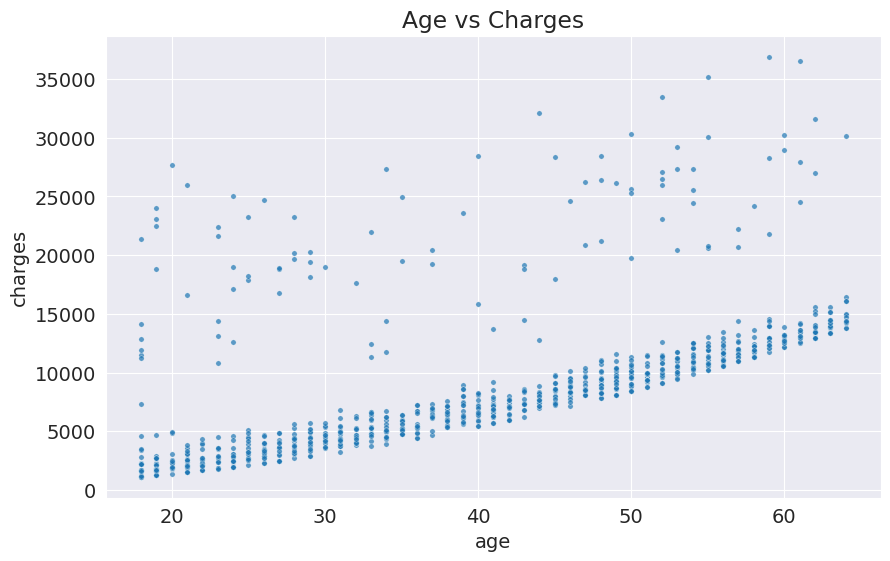

In [ ]:
plt.title('Age vs Charges')
sns.scatterplot(data = non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s = 15)
plt.show()

In [ ]:
def estimate_charges(age, w, b):
  return w * age + b

In [ ]:
w = 50
b = 100

In [ ]:
estimate_charges(30, w, b)

1600

In [ ]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [ ]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [ ]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Charges')

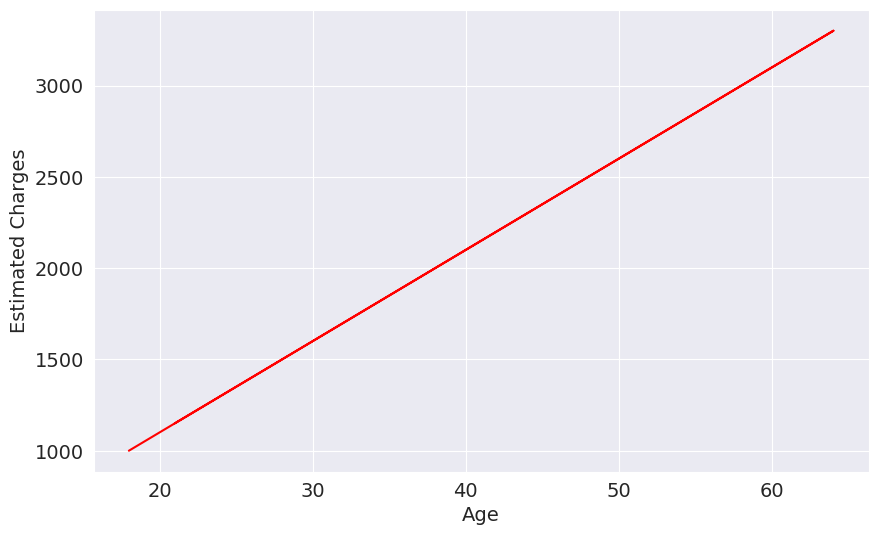

In [ ]:
plt.plot(ages, estimated_charges,'r-')
plt.xlabel('Age')
plt.ylabel("Estimated Charges")

Starting

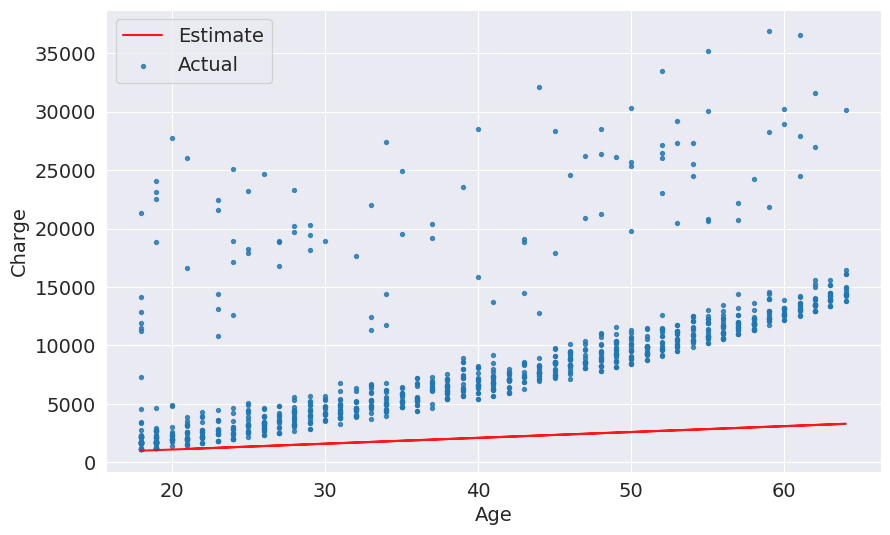

In [ ]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha = 0.9)

plt.scatter(ages, target, s = 8, alpha = 0.8)
plt.xlabel("Age")
plt.ylabel("Charge")
plt.legend(["Estimate", "Actual"])

Improve it a little bit

In [ ]:
def try_parameters(w,b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  estimated_charges = estimate_charges(ages, w, b)
  plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
  plt.scatter(ages, target, s = 8, alpha = 0.8)
  plt.xlabel("Age")
  plt.ylabel("Charge")
  plt.legend(["Estimate", "Actual"])

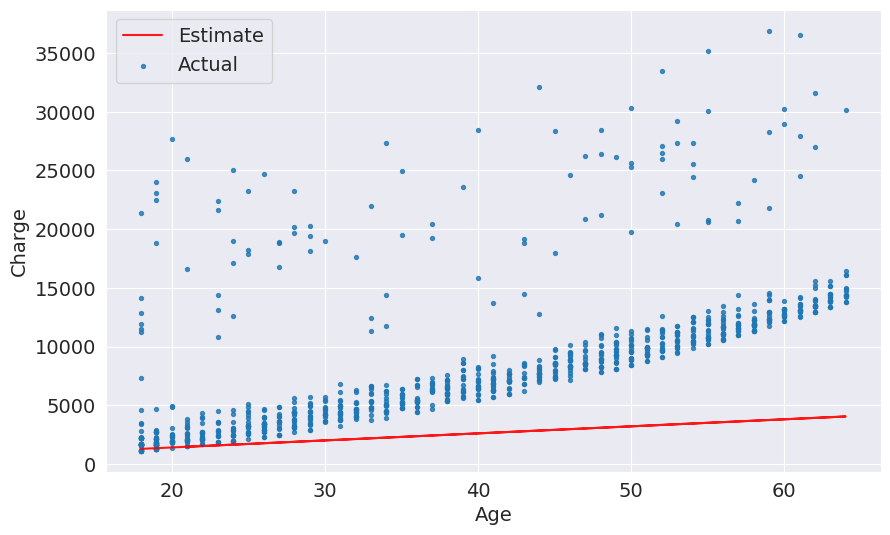

In [ ]:
try_parameters(60, 200)

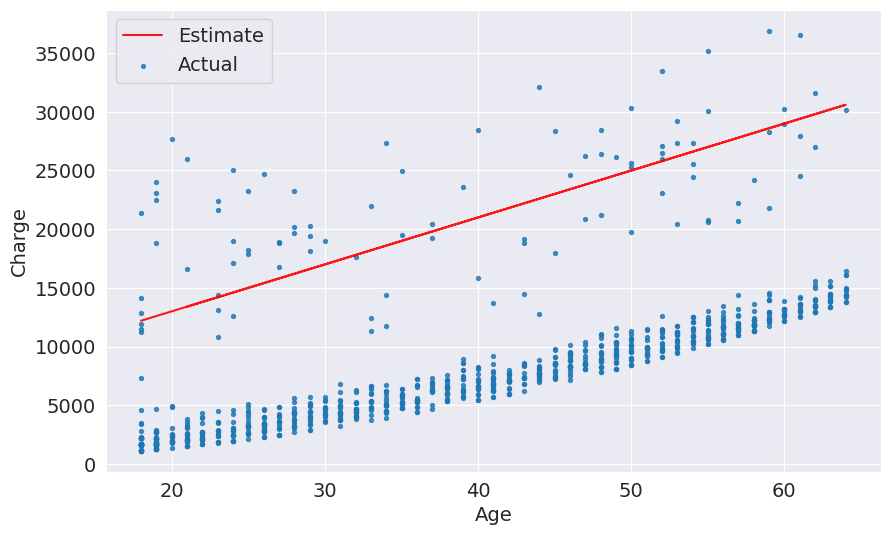

In [ ]:
try_parameters(400, 5000)

In [ ]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [ ]:
import numpy as np

In [ ]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
# w = 50
# b = 100

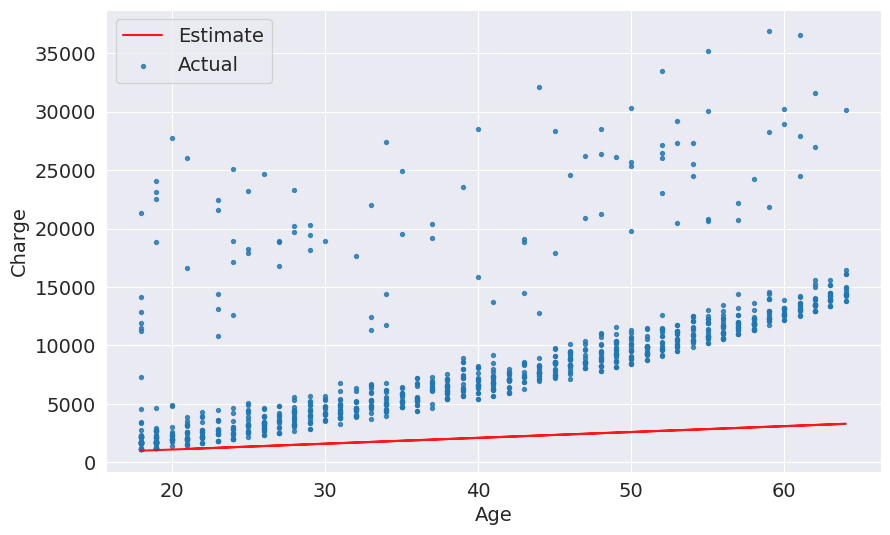

In [ ]:
try_parameters(w,b)

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(targets, predicted)

8461.949562575493

In [ ]:
def kry_parameters(h,j):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  predictions = estimate_charges(ages, h, j)

  plt.plot(ages, predictions, 'r', alpha = 0.9)
  plt.scatter(ages, target, s = 8, alpha = 0.8)
  plt.xlabel("Age")
  plt.ylabel("Charge")
  plt.legend(["Prediction", "Actual"])

  loss = rmse(target, predictions)
  print("RMSE loss: ", loss)

RMSE loss:  4991.993804156943


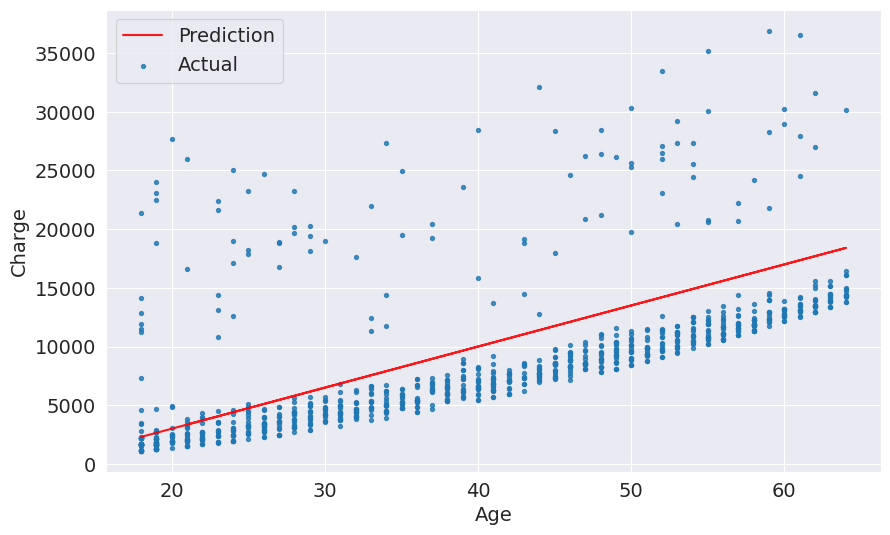

In [ ]:
kry_parameters(350,-4000)

RMSE loss:  848121.2087604242


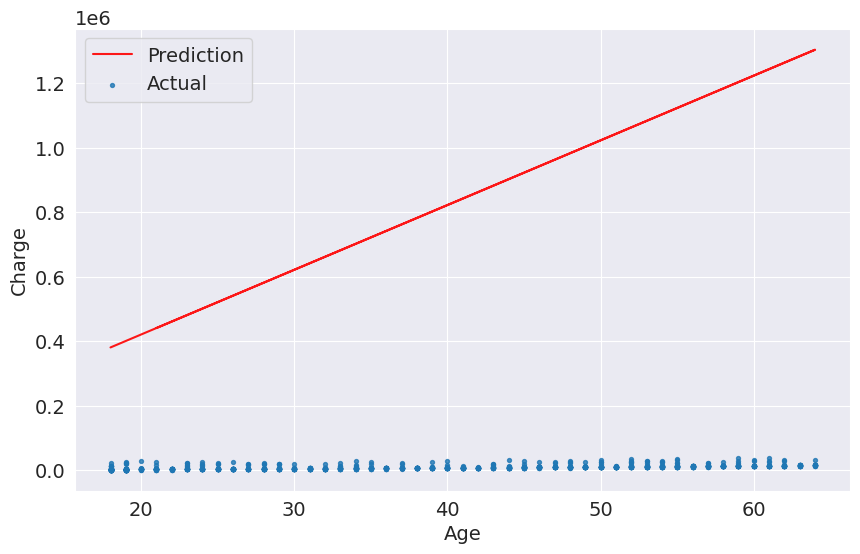

In [ ]:
kry_parameters(20067,19091)

Linear Regression using scikit learn

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
inputs = non_smoker_df[['age']]  # if we don't want a series and want a dataframe then we have to use double [[]]
targets = non_smoker_df.charges
print("inputs.shape: ", inputs.shape)
print("targets.shape: ", targets.shape)

inputs.shape:  (1064, 1)
targets.shape:  (1064,)


In [ ]:
model.fit(inputs, targets)

LinearRegression()

In [ ]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
rmse(targets, predictions)

4662.505766636395

In [ ]:
model.coef_  # w

array([267.24891283])

In [ ]:
model.intercept_  # b

-2091.4205565650864

RMSE loss:  4662.516524487403


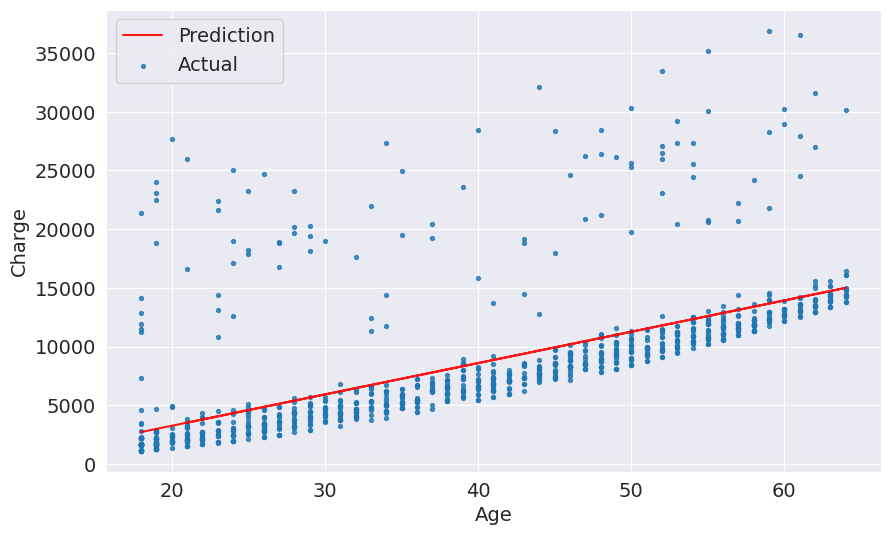

In [ ]:
kry_parameters(267, -2091)

In [ ]:
from sklearn.linear_model import SGDRegressor
model1 = SGDRegressor()

In [ ]:
model1.fit(inputs, targets)

SGDRegressor()

In [ ]:
predictions = model1.predict(inputs)
predictions

array([2361.66160494, 3679.00905943, 4337.68278667, ..., 2361.66160494,
       2361.66160494, 2756.86584129])

In [ ]:
rmse(targets, predictions)

5997.96958778092

Smokers

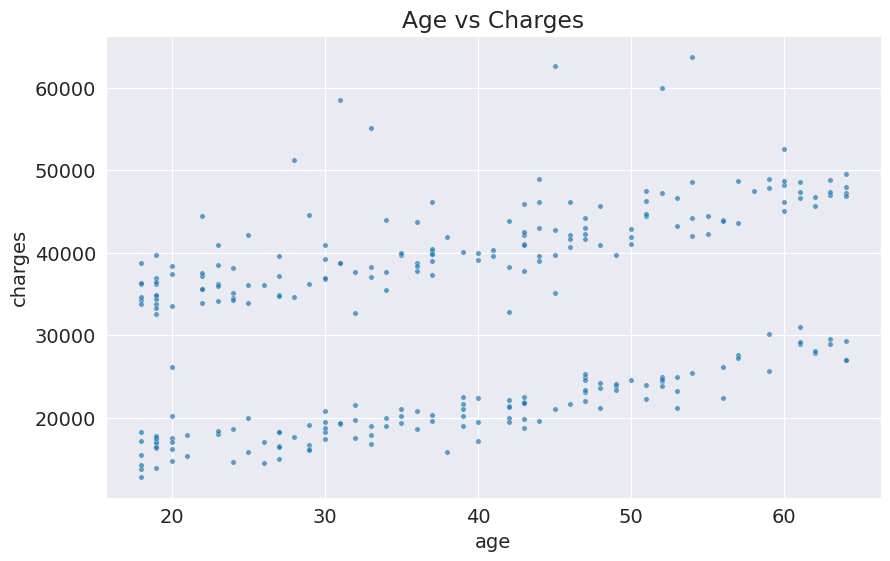

In [ ]:
smoker_df = medical_df[medical_df.smoker == 'yes']
plt.title('Age vs Charges')
sns.scatterplot(data = smoker_df, x = 'age', y = 'charges', alpha = 0.7, s = 15)
plt.show()

In [ ]:
inputs = smoker_df[['age']]
targets = smoker_df.charges
print(inputs.shape)
print(targets.shape)

(274, 1)
(274,)


In [ ]:
model.fit(inputs, targets)

LinearRegression()

In [ ]:
predictions = model.predict(inputs)
predictions

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [ ]:
rmse(targets, predictions)

10711.00334810241

RMSE loss:  10711.00334810241


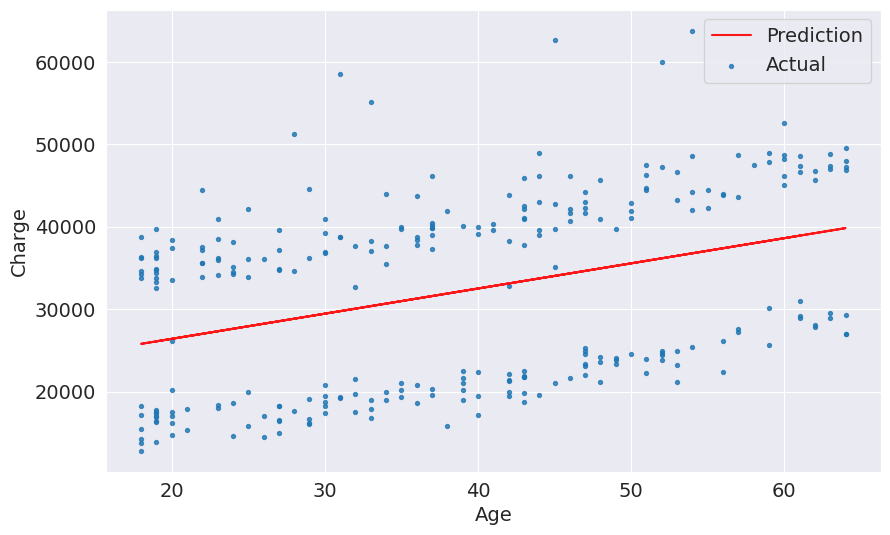

In [ ]:
ages = smoker_df.age
target = smoker_df.charges

predictions = estimate_charges(ages, model.coef_,model.intercept_)
plt.plot(ages, predictions, 'r', alpha = 0.9)
plt.scatter(ages, target, s = 8, alpha = 0.8)
plt.xlabel("Age")
plt.ylabel("Charge")
plt.legend(["Prediction", "Actual"])

loss = rmse(target, predictions)
print("RMSE loss: ", loss)